In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('shop data.csv')

In [9]:
df

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,>35,medium,female,married,yes


In [10]:
x = df.iloc[:,:-1]

In [11]:
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [12]:
y = df.iloc[:,4]

In [13]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14     no
15    yes
16    yes
17    yes
18    yes
19    yes
20     no
21    yes
Name: buys, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le_x=LabelEncoder()
x = x.apply(LabelEncoder().fit_transform)

In [16]:
x

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25,random_state=1)

In [18]:
xtrain

,age,income,gender,m_status
10,1,2,0,1
4,2,1,0,1
2,0,0,1,1
17,1,0,0,1
6,0,1,0,0
7,1,2,1,0
1,1,0,1,0
14,1,0,1,1
0,1,0,1,1
21,1,1,1,1


In [19]:
xtest

,age,income,gender,m_status
19,0,0,1,1
16,2,2,1,0
3,2,2,1,1
13,2,2,1,0
18,0,2,0,0
15,1,0,0,0


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dect = DecisionTreeClassifier()

In [22]:
dect.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [23]:
dect.score(xtest, ytest)

0.6666666666666666

**Performance using cross_val_score**

In [1]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(DecisionTreeClassifier(), x, y,cv=3)

array([0.875     , 0.42857143, 0.57142857])

In [17]:
y_predict = dect.predict(xtest)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(ytest, y_predict))
print(classification_report(ytest,y_predict))

[[1 0]
 [1 4]]
              precision    recall  f1-score   support

          no       0.50      1.00      0.67         1
         yes       1.00      0.80      0.89         5

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6



In [24]:
#xinput = np.array([1,0,0,1])
xinput = np.array([1,0,1,1])

In [25]:
y_predict = dect.predict([xinput])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [27]:
y_predict

array(['no'], dtype=object)

[Text(0.3333333333333333, 0.9, 'age <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4444444444444444, 0.7, 'gender <= 0.5\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.2222222222222222, 0.5, 'age <= 1.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3333333333333333, 0.3, 'income <= 1.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.5, 'income <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.3, 'm_status <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(

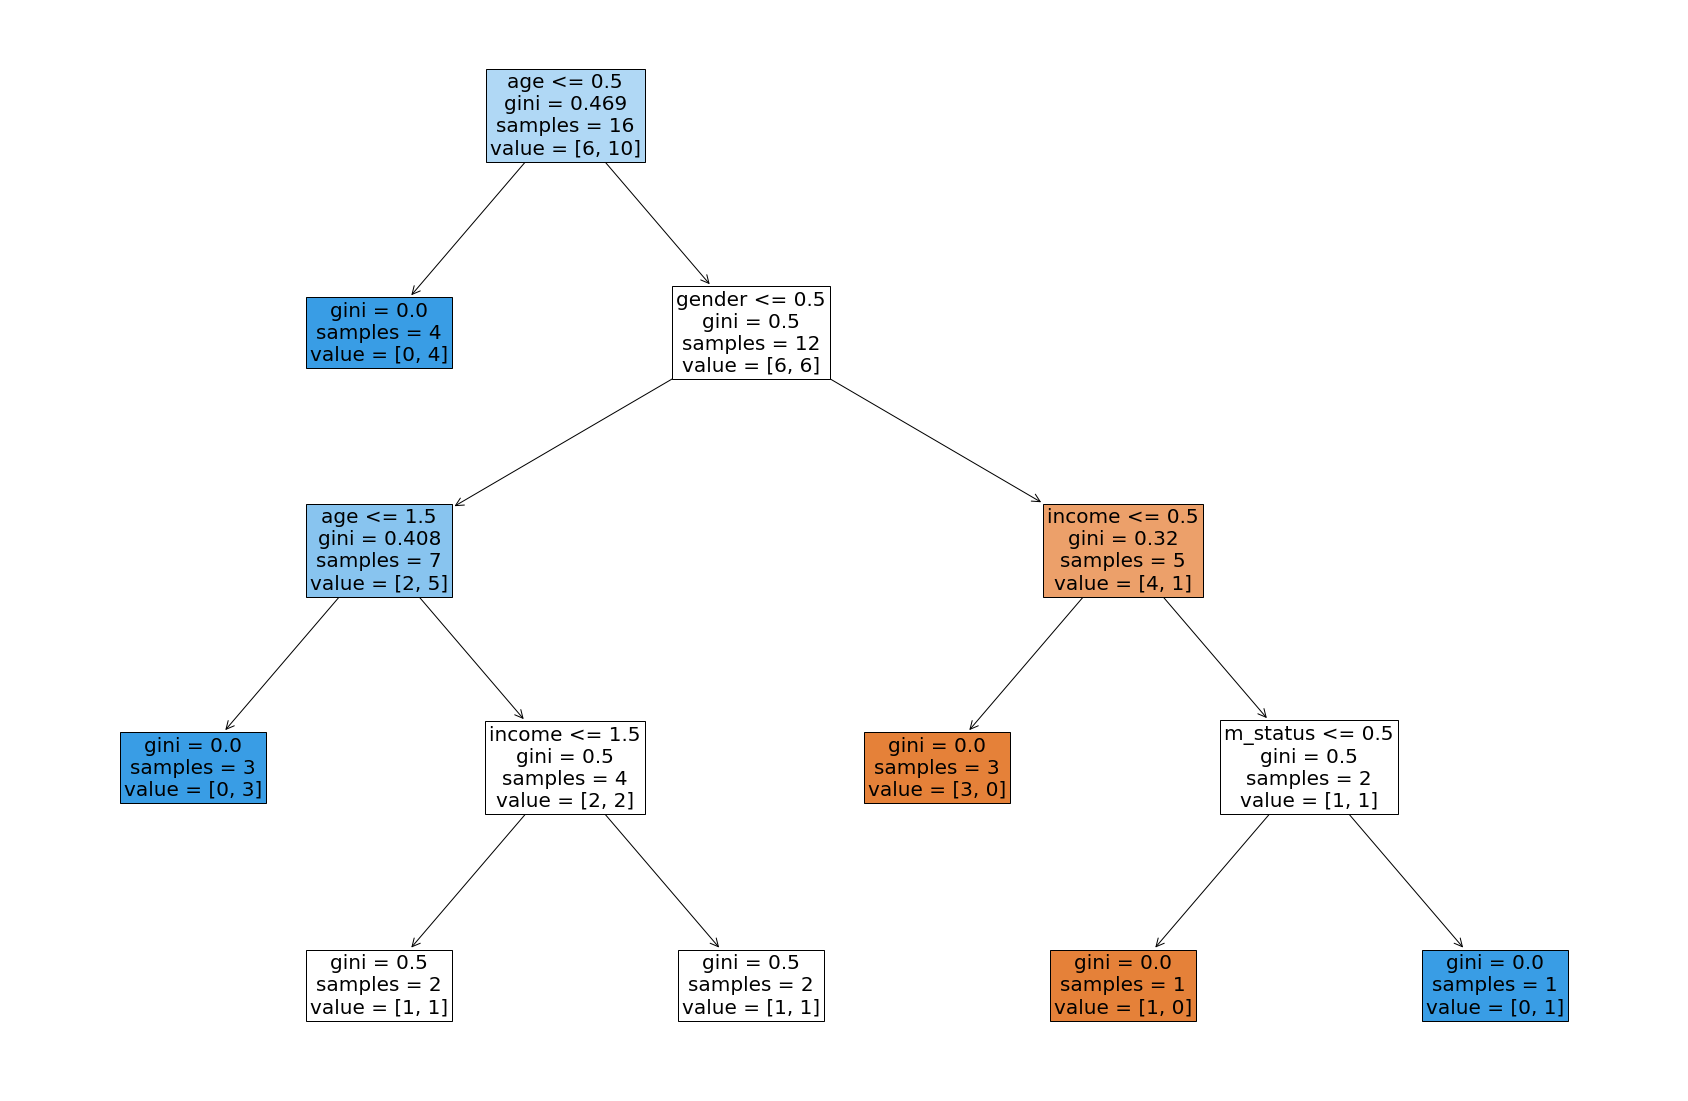

In [28]:
from sklearn import tree
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(30,20))
tree.plot_tree(dect, feature_names=x.columns, filled=True, fontsize=20)